In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest


In [2]:
data1=pd.read_csv('menu.csv')

In [3]:
data1.head(50)

Category                                               Item  \
0     Breakfast                                       Egg McMuffin   
1     Breakfast                                  Egg White Delight   
2     Breakfast                                   Sausage McMuffin   
3     Breakfast                          Sausage McMuffin with Egg   
4     Breakfast                   Sausage McMuffin with Egg Whites   
5     Breakfast                               Steak & Egg McMuffin   
6     Breakfast      Bacon, Egg & Cheese Biscuit (Regular Biscuit)   
7     Breakfast        Bacon, Egg & Cheese Biscuit (Large Biscuit)   
8     Breakfast  Bacon, Egg & Cheese Biscuit with Egg Whites (R...   
9     Breakfast  Bacon, Egg & Cheese Biscuit with Egg Whites (L...   
10    Breakfast                  Sausage Biscuit (Regular Biscuit)   
11    Breakfast                    Sausage Biscuit (Large Biscuit)   
12    Breakfast         Sausage Biscuit with Egg (Regular Biscuit)   
13    Breakfast           Sausage Biscuit with Egg (Large Biscuit)   
14    Breakfast  Sausage Biscuit with Egg Whites (Regular Biscuit)   
15    Breakfast    Sausage Biscuit with Egg Whites (Large Biscuit)   
16    Breakfast   Southern Style Chicken Biscuit (Regular Biscuit)   
17    Breakfast     Southern Style Chicken Biscuit (Large Biscuit)   
18    Breakfast              Steak & Egg Biscuit (Regular Biscuit)   
19    Breakfast                     Bacon, Egg & Cheese McGriddles   
20    Breakfast     Bacon, Egg & Cheese McGriddles with Egg Whites   
21    Breakfast                                 Sausage McGriddles   
22    Breakfast                   Sausage, Egg & Cheese McGriddles   
23    Breakfast   Sausage, Egg & Cheese McGriddles with Egg Whites   
24    Breakfast                          Bacon, Egg & Cheese Bagel   
25    Breakfast          Bacon, Egg & Cheese Bagel with Egg Whites   
26    Breakfast                          Steak, Egg & Cheese Bagel   
27    Breakfast                    Big Breakfast (Regular Biscuit)   
28    Breakfast                      Big Breakfast (Large Biscuit)   
29    Breakfast    Big Breakfast with Egg Whites (Regular Biscuit)   
30    Breakfast      Big Breakfast with Egg Whites (Large Biscuit)   
31    Breakfast      Big Breakfast with Hotcakes (Regular Biscuit)   
32    Breakfast        Big Breakfast with Hotcakes (Large Biscuit)   
33    Breakfast  Big Breakfast with Hotcakes and Egg Whites (Re...   
34    Breakfast  Big Breakfast with Hotcakes and Egg Whites (La...   
35    Breakfast                                           Hotcakes   
36    Breakfast                               Hotcakes and Sausage   
37    Breakfast                                    Sausage Burrito   
38    Breakfast                                         Hash Brown   
39    Breakfast                                     Cinnamon Melts   
40    Breakfast                              Fruit & Maple Oatmeal   
41    Breakfast          Fruit & Maple Oatmeal without Brown Sugar   
42  Beef & Pork                                            Big Mac   
43  Beef & Pork                        Quarter Pounder with Cheese   
44  Beef & Pork                Quarter Pounder with Bacon & Cheese   
45  Beef & Pork          Quarter Pounder with Bacon Habanero Ranch   
46  Beef & Pork                             Quarter Pounder Deluxe   
47  Beef & Pork                 Double Quarter Pounder with Cheese   
48  Beef & Pork                                          Hamburger   
49  Beef & Pork                                       Cheeseburger   

       Serving Size  Calories  Calories from Fat  Total Fat  \
0    4.8 oz (136 g)       300                120       13.0   
1    4.8 oz (135 g)       250                 70        8.0   
2    3.9 oz (111 g)       370                200       23.0   
3    5.7 oz (161 g)       450                250       28.0   
4    5.7 oz (161 g)       400                210       23.0   
5    6.5 oz (185 g)       430                210       23.

<AxesSubplot:>

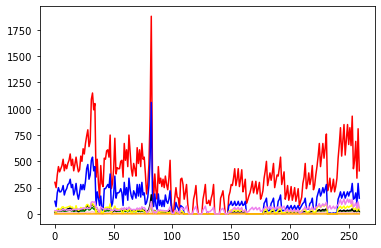

In [4]:
data1['Calories'].plot(kind='line',color='red',label='Calories')
data1['Calories from Fat'].plot(kind='line',color='blue',label='Calories from Fat')
data1['Total Fat'].plot(kind='line',color='green',label='Total Fat')
data1['Total Fat (% Daily Value)'].plot(kind='line',color='black',label='Total Fat (% Daily Value)')
data1['Saturated Fat'].plot(kind='line',color='pink',label='Saturated Fat')
data1['Saturated Fat (% Daily Value)'].plot(kind='line',color='yellow',label='Saturated Fat (% Daily Value)')
data1['Trans Fat'].plot(kind='line',color='orange',label='Trans Fat')
data1['Carbohydrates'].plot(kind='line',color='violet',label='Carbohydrates')

In [5]:
data1.describe()

Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                      26.639209    0.429133    87.269257   
min         0.000000                       0.000000    0.000000     0.000000   
25%         1.000000                       4.750000    0.000000     5.000000   
50%         5.000000                      24.000000    0.000000    35.000000   
75%        10.000000                      48.000000    0.000000    65.000000   
max        20.000000                     102.000000    2.500000   575.000000   

       Cholesterol (% Daily Value)       Sodium  ...  Carbohydrates  \
count                   260.000000   260.000000  ...     260.000000   
mean                     18.392308   495.750000  ...      47.346154   
std                      29.091653   577.026323  ...      28.252232   
min                       0.000000     0.000000  ...       0.000000   
25%                       2.000000   107.500000  ...      30.000000   
50%                      11.000000   190.000000  ...      44.000000   
75%                      21.250000   865.000000  ...      60.000000   
max                     192.000000  3600.000000  ...     141.000000   

       Carbohydrates (% Daily Value)  Dietary Fiber  \
count                     260.000000     260.000000   
mean                       15.780769       1.630769   
std                         9.419544       1.567717   
min                         0.000000       0.000000   
25%                        10.000000       0.000000   
50%                        15.000000       1.000000   
75%                        20.000000       3.000000   
max                        47.000000       7.000000   

       Dietary Fiber (% Daily Value)      Sugars     Protein  \
count                     260.000000  260.000000  260.000000   
mean                        6.530769   29.423077   13.338462   
std                         6.307057   28.679797   11.426146   
min                         0.000000    0.000000    0.000000   
25%                         0.000000    5.750000    4.000000   
50%                         5.000000   17.500000   12.000000   
75%                        10.000000   48.000000   19.000000   
max                        28.000000  128.000000   87.000000   

       Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
count                 260.000000                 260.000000   
mean                   13.426923                   8.534615   
std                    24.366381                  26.345542   
min                     0.000000                   0.000000   
25%                     2.000000                   0.000000   
50%                     8.000000                   0.000000   
75%                    15.000000                   4.000000   
max                   170.000000                 240.000000   

       Calcium (% Daily Value)  Iron (% Daily Value)  
count               260.000000            260.000000  
mean                 20.973077              7.734615  
std                  17.019953              8.723263  
min                   0.000000              0.000000  
25%         

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [7]:
data1.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [8]:
data1.shape

(260, 24)

<AxesSubplot:xlabel='Calories', ylabel='Category'>

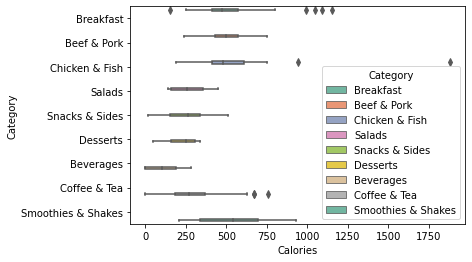

In [10]:
import seaborn as sns
sns.boxplot(x = data1['Calories'],y = data1['Category'],hue = data1['Category'],palette = 'Set2')

In [11]:
labels = data1["Category"].value_counts()[:10].index
values = data1["Category"].value_counts()[:10].values

colors=data1["Category"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

In [12]:
labels = data1["Item"].value_counts()[:10].index
values = data1["Item"].value_counts()[:10].values

colors=data1["Item"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

In [13]:
labels = data1["Total Fat"].value_counts()[:10].index
values = data1["Total Fat"].value_counts()[:10].values

colors=data1["Total Fat"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

In [14]:
data1['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

<AxesSubplot:>

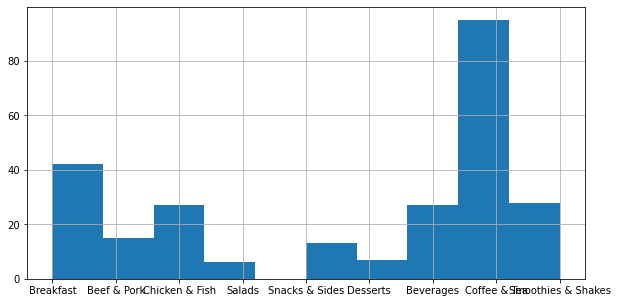

In [15]:
plt.figure(figsize=(10,5))
data1['Category'].hist()

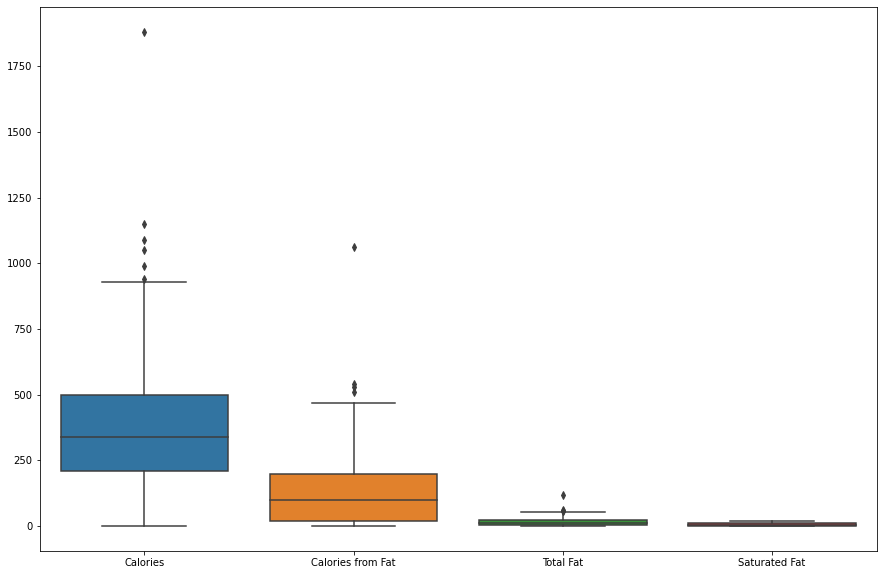

In [16]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.boxplot(data=data1[['Calories','Calories from Fat','Total Fat','Saturated Fat']]);

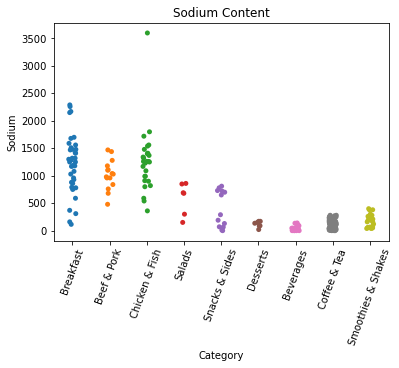

In [17]:
plot=sns.stripplot(x="Category", y='Sodium', data=data1)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sodium Content')
plt.show()

In [18]:

item1=["Chicken & Fish","Breakfast","Smoothies & Shakes","Beef & Pork","Snacks & Sides","Desserts","Beverages"]

1 . Chicken & Fish


C:\Users\DELL\AppData\Local\Temp\ipykernel_13908\3651255561.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



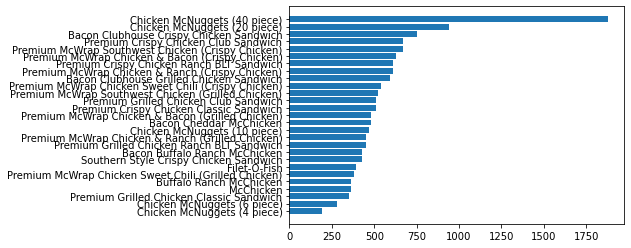

2 . Breakfast


C:\Users\DELL\AppData\Local\Temp\ipykernel_13908\3651255561.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



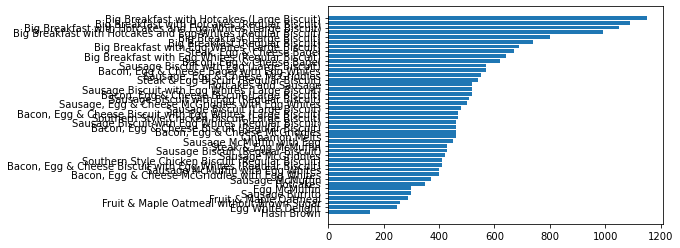

3 . Smoothies & Shakes


C:\Users\DELL\AppData\Local\Temp\ipykernel_13908\3651255561.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



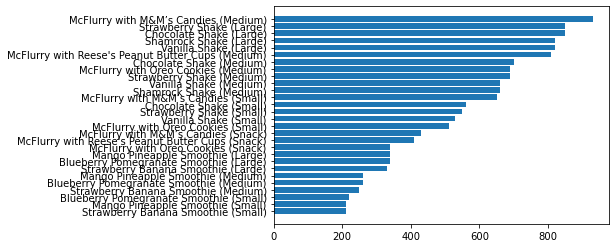

4 . Beef & Pork


C:\Users\DELL\AppData\Local\Temp\ipykernel_13908\3651255561.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



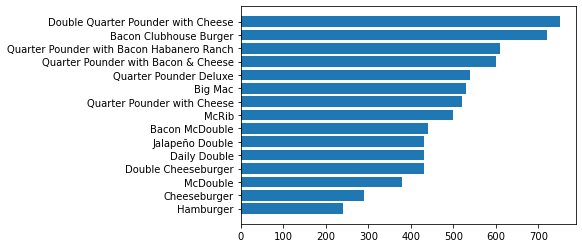

5 . Snacks & Sides


C:\Users\DELL\AppData\Local\Temp\ipykernel_13908\3651255561.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



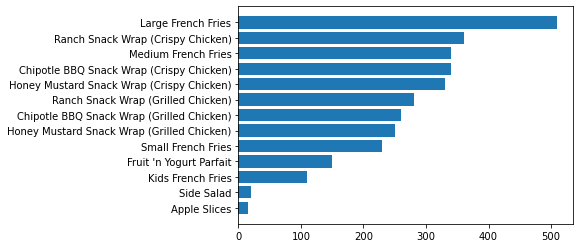

6 . Desserts


C:\Users\DELL\AppData\Local\Temp\ipykernel_13908\3651255561.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



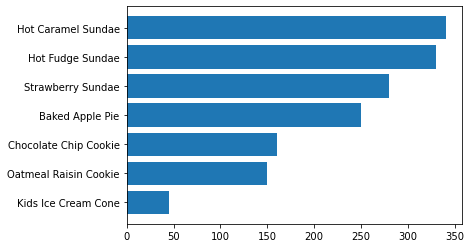

7 . Beverages


C:\Users\DELL\AppData\Local\Temp\ipykernel_13908\3651255561.py:18: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis='index')`



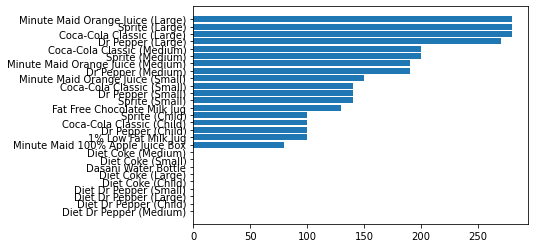

In [19]:
for list in item1:
    #items ascending=False
    items=data1.query('Category == list').sort_values(by="Calories", ascending=False)
    items_custom=items.iloc[:,[1,3,5]]
    
    #items ascending=True
    items_t=data1.query('Category == list').sort_values(by="Calories", ascending=True)
    items_custom_t=items_t.iloc[:,[1,3,5]]
    
    #Print Categories
    print(item1.index(list)+1,".",list)
    
    #Plotly Express
    p_express = px.scatter(items_custom, x="Total Fat",y='Calories', color="Item",size='Calories',template="plotly_dark",hover_name="Item")
    p_express.show()
    
      #Display Tables ranked by calories
    table=items_custom.iloc[:,[0,1]].sort_values(by="Calories", ascending=False).style.hide_index()
    #table=table.style.hide_index()
    display(table)
    fig,ax=plt.subplots()
    x=items_custom_t.iloc[:,0]
    y=items_custom_t.iloc[:,1]
    ax.barh(x,y, tick_label=x)
    plt.show()

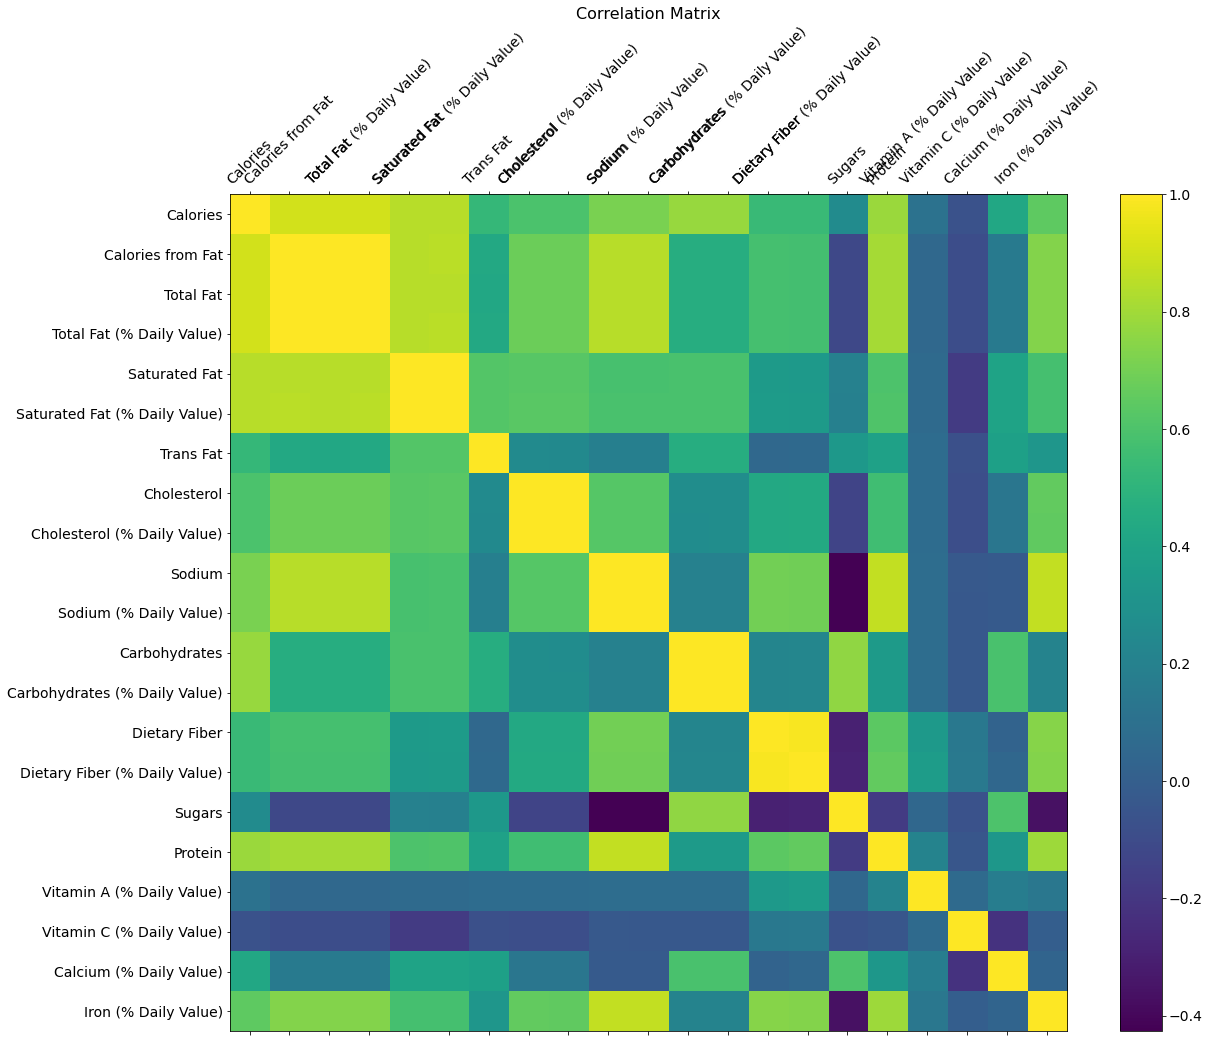

In [20]:
fig = plt.figure(figsize=(19, 15))
plt.matshow(data1.corr(), fignum=fig.number)
plt.xticks(range(data1.select_dtypes(['number']).shape[1]), data1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data1.select_dtypes(['number']).shape[1]), data1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

<AxesSubplot:xlabel='Protein', ylabel='Item'>

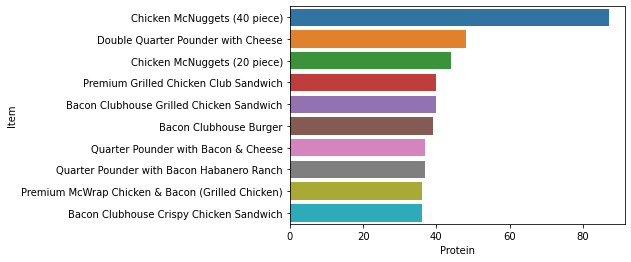

In [33]:
data_Protein = data1.sort_values(by = ['Protein'], ascending=False)
sns.barplot(y="Item", x="Protein", data = data_Protein.head(10))

<AxesSubplot:xlabel='Total Fat (% Daily Value)', ylabel='Item'>

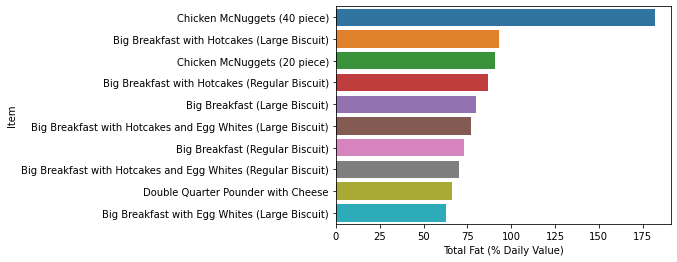

In [35]:
data_Fat = data1.sort_values(by = ['Total Fat (% Daily Value)'], ascending=False)
sns.barplot(y="Item", x="Total Fat (% Daily Value)", data = data_Fat.head(10))

<AxesSubplot:xlabel='Cholesterol', ylabel='Item'>

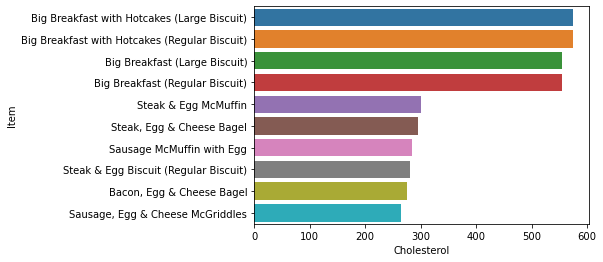

In [37]:
data_Fat = data1.sort_values(by = ['Cholesterol'], ascending=False)
sns.barplot(y="Item", x="Cholesterol", data = data_Fat.head(10))

<AxesSubplot:xlabel='Calories', ylabel='Item'>

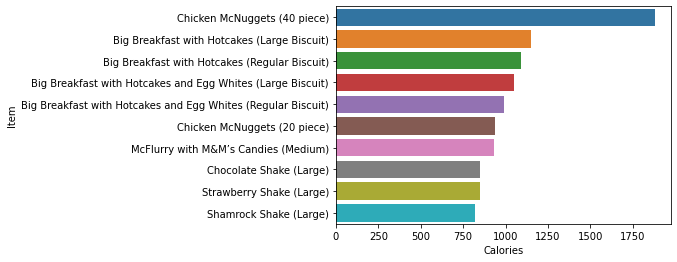

In [38]:
data_Fat = data1.sort_values(by = ['Calories'], ascending=False)
sns.barplot(y="Item", x="Calories", data = data_Fat.head(10))